In [1]:
#A health insurance company is looking for an opportunity to offer vehicle insurance to its customers
#We are going to predict whether customers of the company will be also interested in vehicle insurance
#Import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
#Import the dataset, check the number of rows and columns of the dataset, and inspect the dataset
vech_ins = pd.read_csv("D:/datacamp/Python/Linear Classifiers in Python/train.csv")
print(vech_ins.shape)
print(vech_ins.info())

(381109, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [3]:
#Here are the descriptions of the columns on the dataset
#1. id - unique ID number of customer
#2. Gender - Gender of customer 
#3. Age - Age of customer
#4. Driving_license - 0 : customer does not have driving license, 1 : customer does has driving license
#5. Region_code - unique code for the region of customer
#6. Previously_Insured - 0 : customer does not have vehicle insurance, 1 : customer has vehicle insurance
#7. Vehicle_Age - Age of customer's vehicle
#8. Vehicle_Damage - 0 : customer didn't get his/her vehicle damaged, 1 : customer got his/her vehicle damaged
#9. Annual_Premium - the amount customer has to pay as premium in the year
#10. Policy_Sales_Channel - Anonymized Code for the channel of outreaching to the customer
#11. Vintage - number of days customer has been associated with company
#12. Response - 0 : customer is not interested, 1 : customer is interested

#Set the id column as the index of the dataset
vech_ins.index = vech_ins["id"]
vech_ins = vech_ins.drop("id", axis=1)
print(vech_ins.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB
None


In [4]:
print(vech_ins.describe())

                 Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2

In [5]:
#EDA
#Take a look at the number of customers which are interested in vehicle insurance and which are not interested
print(vech_ins["Response"].value_counts(sort=True))

0    334399
1     46710
Name: Response, dtype: int64


In [6]:
#Take a look at the proportion of customers which are interested in vehicle insurance and which are not interested
print(vech_ins["Response"].value_counts(sort=True)/len(vech_ins))

0    0.877437
1    0.122563
Name: Response, dtype: float64


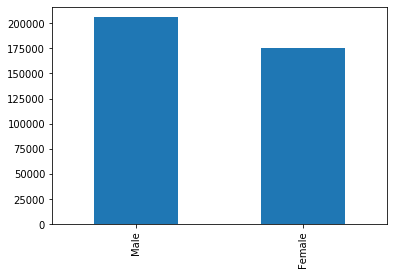

In [7]:
#Gender
vech_ins["Gender"].value_counts(sort=True).plot(kind="bar")
plt.show()

In [8]:
print(pd.crosstab(vech_ins['Gender'],vech_ins['Response'])/len(vech_ins))

Response         0         1
Gender                      
Female    0.411523  0.047716
Male      0.465914  0.074847


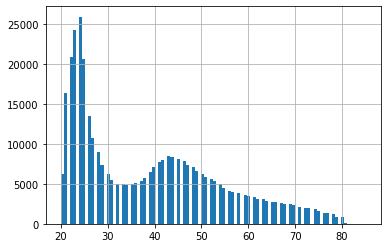

In [9]:
#Age
vech_ins["Age"].hist(bins=100)
plt.show()

In [10]:
#Print the variance of Age column
print(vech_ins["Age"].var())

240.6100763765522


In [11]:
#Driving License
print(vech_ins["Driving_License"].value_counts(sort = True))

1    380297
0       812
Name: Driving_License, dtype: int64


In [12]:
print(pd.crosstab(vech_ins["Driving_License"],vech_ins["Response"])/len(vech_ins))

Response                0         1
Driving_License                    
0                0.002023  0.000108
1                0.875414  0.122456


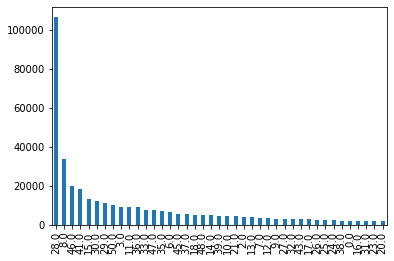

In [27]:
#Region Code
vech_ins["Region_Code"].value_counts(sort=True)[:20].plot(kind="bar")
plt.show()

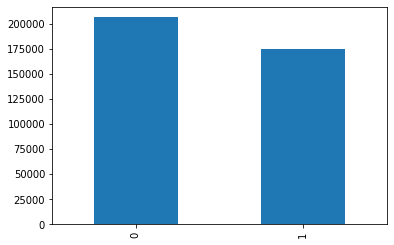

In [14]:
#Previously Insured
vech_ins["Previously_Insured"].value_counts(sort=True).plot(kind="bar")
plt.show()

In [15]:
print(pd.crosstab(vech_ins["Previously_Insured"],vech_ins["Response"])/len(vech_ins))

Response                   0         1
Previously_Insured                    
0                   0.419641  0.122149
1                   0.457796  0.000415


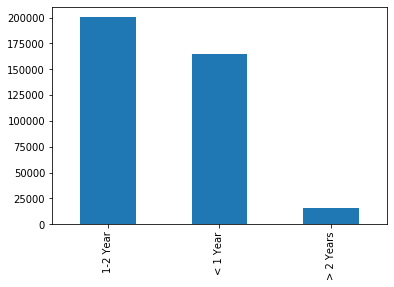

In [16]:
#Vehicle Age
vech_ins["Vehicle_Age"].value_counts(sort=True).plot(kind="bar")
plt.show()

In [17]:
print(pd.crosstab(vech_ins["Vehicle_Age"],vech_ins["Response"])/len(vech_ins))

Response            0         1
Vehicle_Age                    
1-2 Year     0.434285  0.091328
< 1 Year     0.413488  0.018897
> 2 Years    0.029663  0.012338


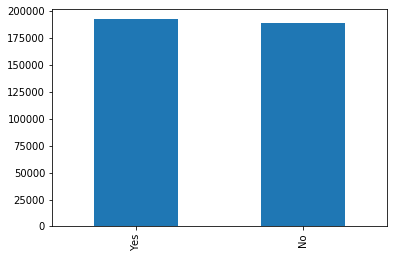

In [18]:
#Vehicle Damage
vech_ins["Vehicle_Damage"].value_counts(sort=True).plot(kind="bar")
plt.show()

In [19]:
print(print(pd.crosstab(vech_ins["Previously_Insured"],vech_ins["Response"])/len(vech_ins)))

Response                   0         1
Previously_Insured                    
0                   0.419641  0.122149
1                   0.457796  0.000415
None


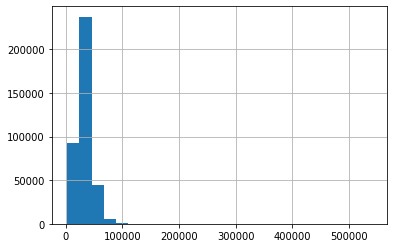

In [20]:
#Annual Premium
vech_ins["Annual_Premium"].hist(bins=25)
plt.show()

In [21]:
#Print the variance of Annual_Premium column
print(vech_ins["Annual_Premium"].var())

296292707.01519835


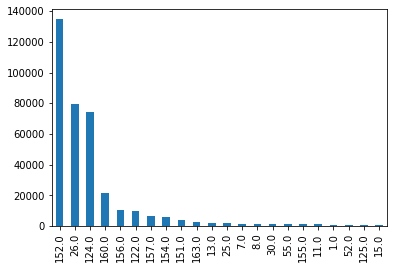

In [25]:
#Policy Sales Channel
vech_ins["Policy_Sales_Channel"].value_counts(sort=True)[:15].plot(kind="bar")
plt.show()

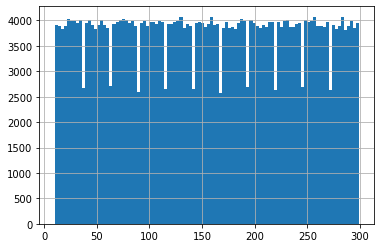

In [28]:
#Vintage
vech_ins["Vintage"].hist(bins=100)
plt.show()

In [29]:
#Print the variance of Vintage column
print(vech_ins["Vintage"].var())

7000.887050572313


In [30]:
#We will use label encoder to transform the predictor variables with categorical data on the dataset,
#except for Driving_License and Previously_Insured column, which has been encoded by default
#Create the label encoder
le = LabelEncoder()

#For Gender column, we will set 0 for "Female" and 1 for "Male"
vech_ins["Gender"] = le.fit_transform(vech_ins["Gender"])

#For Vehicle_Age column, we will set 0 for "1-2 Year", 1 for "<1 Year", and 2 for ">2 Year"
vech_ins["Vehicle_Age"] = le.fit_transform(vech_ins["Vehicle_Age"])

#For Vehicle_Damage column, we will set 0 for "No" and 1 for "Yes"
vech_ins["Vehicle_Damage"] = le.fit_transform(vech_ins["Vehicle_Damage"])

print(vech_ins.tail())
#Inspect the dataset again
print(vech_ins.info())

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
381105       1   74                1         26.0                   1   
381106       1   30                1         37.0                   1   
381107       1   21                1         30.0                   1   
381108       0   68                1         14.0                   0   
381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                          
381105            0               0         30170.0                  26.0   
381106            1               0         40016.0                 152.0   
381107            1               0         35118.0                 160.0   
381108            2               1         44617.0                 124.0   
381109            0       

In [31]:
#Previously, we have seen that Age, Annual_Premium and Vintage columns had large variances
#We need to scale the data in those columns
ss = StandardScaler()
vech_ins[["Age", "Annual_Premium", "Vintage"]] = ss.fit_transform(vech_ins[["Age", "Annual_Premium", "Vintage"]])
print(vech_ins.head())

    Gender       Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                       
1        1  0.333777                1         28.0                   0   
2        1  2.396751                1          3.0                   0   
3        1  0.527181                1         28.0                   0   
4        1 -1.148985                1         11.0                   1   
5        0 -0.633242                1         41.0                   1   

    Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                      
1             2               1        0.574539                  26.0   
2             0               0        0.172636                  26.0   
3             2               1        0.449053                  26.0   
4             1               0       -0.113018                 152.0   
5             1               0       -0.17

In [32]:
#As we've seen before, those columns still have different datatypes
#Transform all of the columns into int32 type
for col in vech_ins.columns:
    vech_ins[col] = vech_ins[col].astype(np.int32)
print(vech_ins.head())

    Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                  
1        1    0                1           28                   0   
2        1    2                1            3                   0   
3        1    0                1           28                   0   
4        1   -1                1           11                   1   
5        0    0                1           41                   1   

    Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                      
1             2               1               0                    26   
2             0               0               0                    26   
3             2               1               0                    26   
4             1               0               0                   152   
5             1               0               0                   152   

    

In [33]:
#We are going to apply machine learning models to make predictions
#Set a variable to store the predictor variables and another variable to store the target variable
X = vech_ins.drop("Response", axis=1)
y = vech_ins["Response"]

In [34]:
#Split the dataset into 75% train set and 25% test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [35]:
#Create a function to show accuracy score of the machine learning models
def model_accuracy(model):
    classifier = model
    y_pred_test = classifier.fit(X_train,y_train).predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    return([acc_test])

In [36]:
#Apply the following models for the predictions to the datasets :
nb = GaussianNB() #Naive Bayes
knn = KNeighborsClassifier() #K-Nearest Neighbor
lr = LogisticRegression() #Logistic Regression
dt = DecisionTreeClassifier() #Decision Tree
rf = RandomForestClassifier() #Random Forest
gbm = GradientBoostingClassifier() #Gradient Boosting

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                 Model  Test Accuracy
0          Naive Bayes       0.641145
1   K-Nearest Neighbor       0.856189
2  Logistic Regression       0.875596
3        Decision Tree       0.867273
4        Random Forest       0.868091
5    Gradient Boosting       0.876509


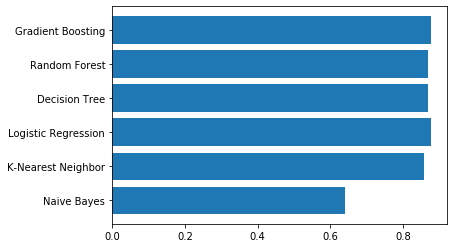

In [37]:
#Create a dictionary contains the model names and their respective created models
model_choice = {'Naive Bayes':nb, 'K-Nearest Neighbor':knn,'Logistic Regression':lr, 'Decision Tree':dt, 'Random Forest':rf
               , 'Gradient Boosting':gbm}
#Create empty lists for the model names and their accuracy
model_name = []
accuracy = []

#Append the empty lists with the model names and their accuracy, respectively
for m in model_choice.keys():
    model_name.append(m)
for model in model_choice.values():
    accuracy.append(model_accuracy(model))

#Create a dataframe of the model names and their accuracy
model_df = pd.DataFrame(model_name, columns = ['Model'])
accuracy_df = pd.DataFrame(accuracy, columns = ['Test Accuracy'])
model_accuracy_df = pd.concat([model_df, accuracy_df],axis=1)
print(model_accuracy_df)

#Show the accuracy of the models in bar graph to check out which machine learning model had the highest accuracy
plt.barh(model_accuracy_df['Model'], model_accuracy_df['Test Accuracy'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


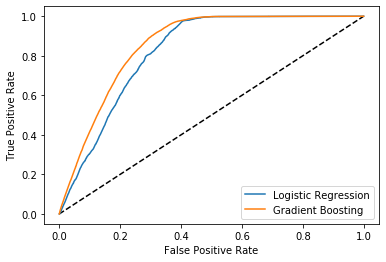

AUC score of Logistic Regression : 0.820
AUC score of Gradient Boosting : 0.854


In [38]:
#From the graph, we can see that Gradient Boosting Logistic Regression are the models with the highest accuracy
#and had the almost same accuracy as well
#To determine which is the best among the two models, create ROC curve and check the AUC score for the two models

#ROC Curve
#Create variables which return probability of all predictions in target variable using the two models
y_prob_lr = lr.fit(X_train, y_train).predict_proba(X_test)[:,1]
y_prob_gbm = gbm.fit(X_train, y_train).predict_proba(X_test)[:,1]

#Set the false positive rate, true positive rate, and threshold
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_prob_gbm)

#Plot the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression')
plt.plot(fpr_gbm, tpr_gbm, label = 'Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#AUC Score
#Show the AUC score of the two models
print('AUC score of Logistic Regression : {:.3f}'.format(roc_auc_score(y_test, y_prob_lr)))
print('AUC score of Gradient Boosting : {:.3f}'.format(roc_auc_score(y_test, y_prob_gbm)))

In [39]:
#Now, let's define a function to run Grid Search Cross Validation
def gscv(model,grid):
    model_gs = GridSearchCV(estimator = model, param_grid = grid, cv=5)
    y_pred = model_gs.fit(X_train, y_train).predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    return(model_gs.best_params_,model_gs.best_score_)

In [40]:
#Let's see how Grid Search Cross Validation improve the accuracy of GBM model
gbm_grid = {'learning_rate':[0.01,0.05]}
print(gscv(gbm, gbm_grid))

({'learning_rate': 0.01}, 0.8777424422063707)


In [41]:
#There's only a slight improvement of the accuracy by applying Grid Search Cross Validation 
#Create confusion matrix to check out how well the model predict each response
gbm_gscv = GradientBoostingClassifier(learning_rate = 0.01)
y_pred_test = gbm_gscv.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred_test))

[[83513     0]
 [11765     0]]


In [42]:
#Well, the model did an exceptional job in predicting which customers not interested in vehicle insurance
#Bu unfortunately, it didn't do a good job in predicting which customers interested in vehicle insurance
#Based on the result on confusion matrix,
#the model actually predicts that selling vehicle insurance to health insurance customer is not a good idea.

#To confirm this, we are going to see the probability of customers interested in vehicle insurance on the following set
test = pd.read_csv("D:/datacamp/Python/Linear Classifiers in Python/test.csv")
test.index = test["id"]
test = test.drop("id", axis=1)
print(test.shape)
print(test.info())

(127037, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127037 entries, 381110 to 508146
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 10.7+ MB
None


In [51]:
#Do the feature engineering of the columns in the same way of the previous data
test_new = test
test_new["Gender"] = le.fit_transform(test_new["Gender"])
test_new["Vehicle_Age"] = le.fit_transform(test_new["Vehicle_Age"])
test_new["Vehicle_Damage"] = le.fit_transform(test_new["Vehicle_Damage"])
test_new[["Age", "Annual_Premium", "Vintage"]] = ss.fit_transform(
    test_new[["Age", "Annual_Premium", "Vintage"]])
print(test_new.head())

        Gender       Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                           
381110       1 -0.057439                1           -1                   1   
381111       1 -0.057439                1            0                   0   
381112       1 -0.057439                1            0                   0   
381113       1 -0.057439                1            0                   1   
381114       1 -0.057439                1            0                   1   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                          
381110            1               0        0.038640                     0   
381111            0               1        0.038640                    -1   
381112            0               1        0.038640                     0   
381113            1               1        0.038640                 

In [52]:
#Convert all of the columns into int32 type
for col in test_new.columns:
    test_new[col] = test_new[col].astype(np.int32)
print(test_new.head())

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
381110       1    0                1           -1                   1   
381111       1    0                1            0                   0   
381112       1    0                1            0                   0   
381113       1    0                1            0                   1   
381114       1    0                1            0                   1   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
id                                                                          
381110            1               0               0                     0   
381111            0               1               0                    -1   
381112            0               1               0                     0   
381113            1               1               0                     0   
381114            1       

In [53]:
#Predict the probability of interested in vehicle insurance
test_pred = gbm_gscv.predict_proba(test_new)[:,1]
test_pred = pd.DataFrame(test_pred,columns=['Prob_Interested'])
print(test_pred.max())

Prob_Interested    0.230868
dtype: float64


In [49]:
#The highest probability of interested in vehicle insurance was only around 0.23
#It is confirmed that the company should not sell vehicle insurance
#Set 
submission = pd.read_csv("D:/datacamp/Python/Linear Classifiers in Python/sample_submission.csv")
print(submission.columns)

Index(['id', 'Response'], dtype='object')


In [50]:
submission = submission.drop("Response", axis=1)
result = pd.concat([submission, test_pred], axis=1)
print(result.head())

       id  Prob_Interested
0  381110         0.047899
1  381111         0.230868
2  381112         0.230868
3  381113         0.080029
4  381114         0.047899


In [54]:
result.to_csv(r'D:/datacamp/Python/Linear Classifiers in Python/Insurance Cross Sell Prediction.csv', header = True)